# Rolling Planning mit Summe-Tardiness

In [1]:
import json
import pandas as pd
pd.set_option('display.max_rows', 40)

import utils.rolling_planning.rescheduling as reschedul

## Laden der Initialisierungsdaten

In [2]:
df_jssp = pd.read_csv("data/07_tardiness_init_jssp.csv")
df_jssp

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
1515,Job_151,5,M9,76
1516,Job_151,6,M5,47
1517,Job_151,7,M3,52
1518,Job_151,8,M4,90


In [3]:
df_times = pd.read_csv("data/07_tardiness_init_times.csv")
df_times

,Job,Arrival,Deadline
0,Job_000,0.00,1069.346415
1,Job_001,88.05,1468.725117
2,Job_002,152.78,1690.473072
3,Job_003,207.97,1981.190004
4,Job_004,246.61,1310.542002
...,...,...,...
147,Job_147,11270.89,13044.110004
148,Job_148,11277.28,12341.212002
149,Job_149,11278.72,12816.413072
150,Job_150,11404.04,12473.386415


### Tag 0 

In [4]:
df_plan = pd.read_csv("data/07_tardiness_init_plan.csv")
df_plan

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_000,0,0.00,1069.346415,M0,0.00,29.0,29.00,0.0
1,Job_000,1,0.00,1069.346415,M1,29.00,78.0,107.00,0.0
2,Job_000,2,0.00,1069.346415,M2,107.00,9.0,116.00,0.0
3,Job_000,3,0.00,1069.346415,M3,116.00,36.0,152.00,0.0
4,Job_000,4,0.00,1069.346415,M4,152.00,49.0,201.00,0.0
...,...,...,...,...,...,...,...,...,...
595,Job_150,5,11404.04,12473.386415,M5,11605.04,11.0,11616.04,0.0
596,Job_150,6,11404.04,12473.386415,M6,11616.04,62.0,11678.04,0.0
597,Job_150,7,11404.04,12473.386415,M7,11678.04,56.0,11734.04,0.0
598,Job_150,8,11404.04,12473.386415,M8,11734.04,44.0,11778.04,0.0


In [5]:
df_execution = pd.read_csv("data/07_tardiness_init_execution.csv")
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,13.20,13.20,13.20
1,Job_000,1,0.00,M1,29.00,88.87,117.87,117.87
2,Job_000,2,0.00,M2,117.87,12.42,130.29,130.29
3,Job_000,3,0.00,M3,130.29,44.52,174.81,174.81
4,Job_000,4,0.00,M4,174.81,50.41,225.22,225.22
...,...,...,...,...,...,...,...,...
82,Job_010,1,891.94,M0,1400.21,69.67,577.94,1469.88
83,Job_015,0,1197.28,M2,1286.48,9.66,98.86,1296.14
84,Job_015,1,1197.28,M0,1296.14,6.49,105.35,1302.63
85,Job_015,2,1197.28,M1,1302.63,16.13,121.48,1318.76


In [6]:
df_undone = pd.read_csv("data/07_tardiness_init_undone.csv")
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_010,2,891.94,M1,1328.88,46.0
1,Job_015,4,1197.28,M3,1333.94,26.0
2,Job_015,5,1197.28,M4,1359.94,69.0
3,Job_009,7,781.95,M3,1381.54,52.0
4,Job_010,3,891.94,M5,1382.14,74.0
...,...,...,...,...,...,...
508,Job_150,5,11404.04,M5,11605.04,11.0
509,Job_150,6,11404.04,M6,11616.04,62.0
510,Job_150,7,11404.04,M7,11678.04,56.0
511,Job_150,8,11404.04,M8,11734.04,44.0


## Settings

In [7]:
solver_limit = 60*60*3.25 # 3 1/4 h
solver_limit

notebook_prefix = "07a"

## Params

In [8]:
# fix
day_length = 1440
horizon_days = 3

## Rescheduling für Tage 1-3

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 48832.3889
  Solver-Status           : Optimal
  Anzahl Variablen        : 28277
  Anzahl Constraints      : 55669


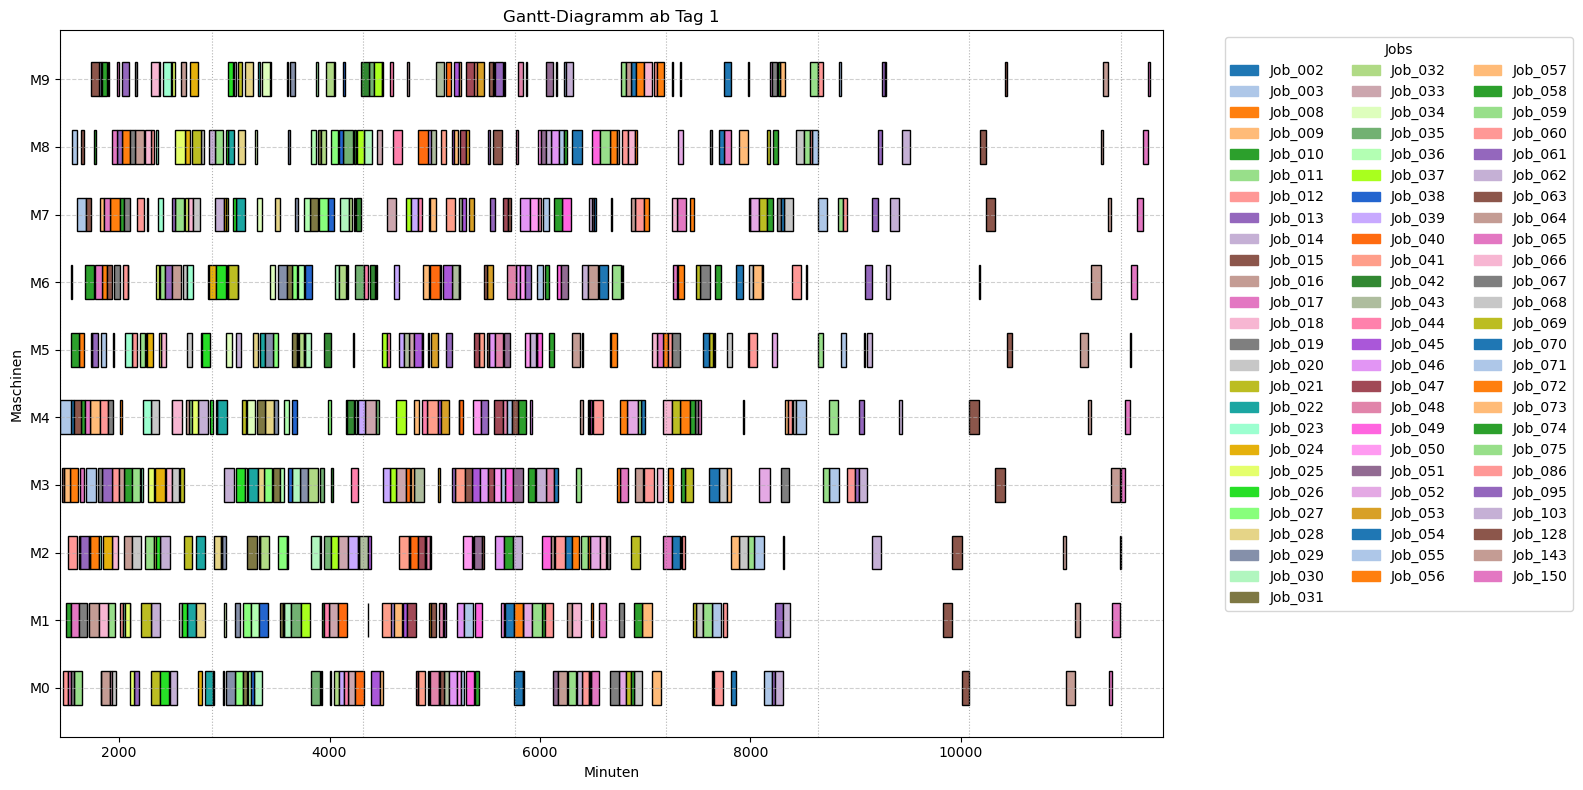

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[24:00:00] Job_003 started on M4
[24:12:52] Job_015 started on M3
[24:30:28] Job_012 started on M0
[24:39:20] Job_015 finished on M3 (after 26 minutes 28 seconds)
[24:39:28] Job_009 started on M3
[24:56:35] Job_010 started on M1
[25:10:36] Job_012 finished on M0 (after 40 minutes 08 seconds)
[25:13:28] Job_012 started on M2
[25:14:04] Job_017 started on M0
[25:42:37] Job_017 finished on M0 (after 28 minutes 33 seconds)
[25:43:40] Job_019 started on M0
[25:56:22] Job_009 finished on M3 (after 76 minutes 54 seconds)
[25:56:22] Job_008 started on M3
[26:00:03] Job_019 finished on M0 (after 16 minutes 23 seconds)
[26:09:15] Job_010 finished on M1 (after 72 minutes 40 seconds)
[26:09:15] Job_017 started on M1
[26:09:15] Job_010 started on M5
[26:12:34] Job_003 finished on

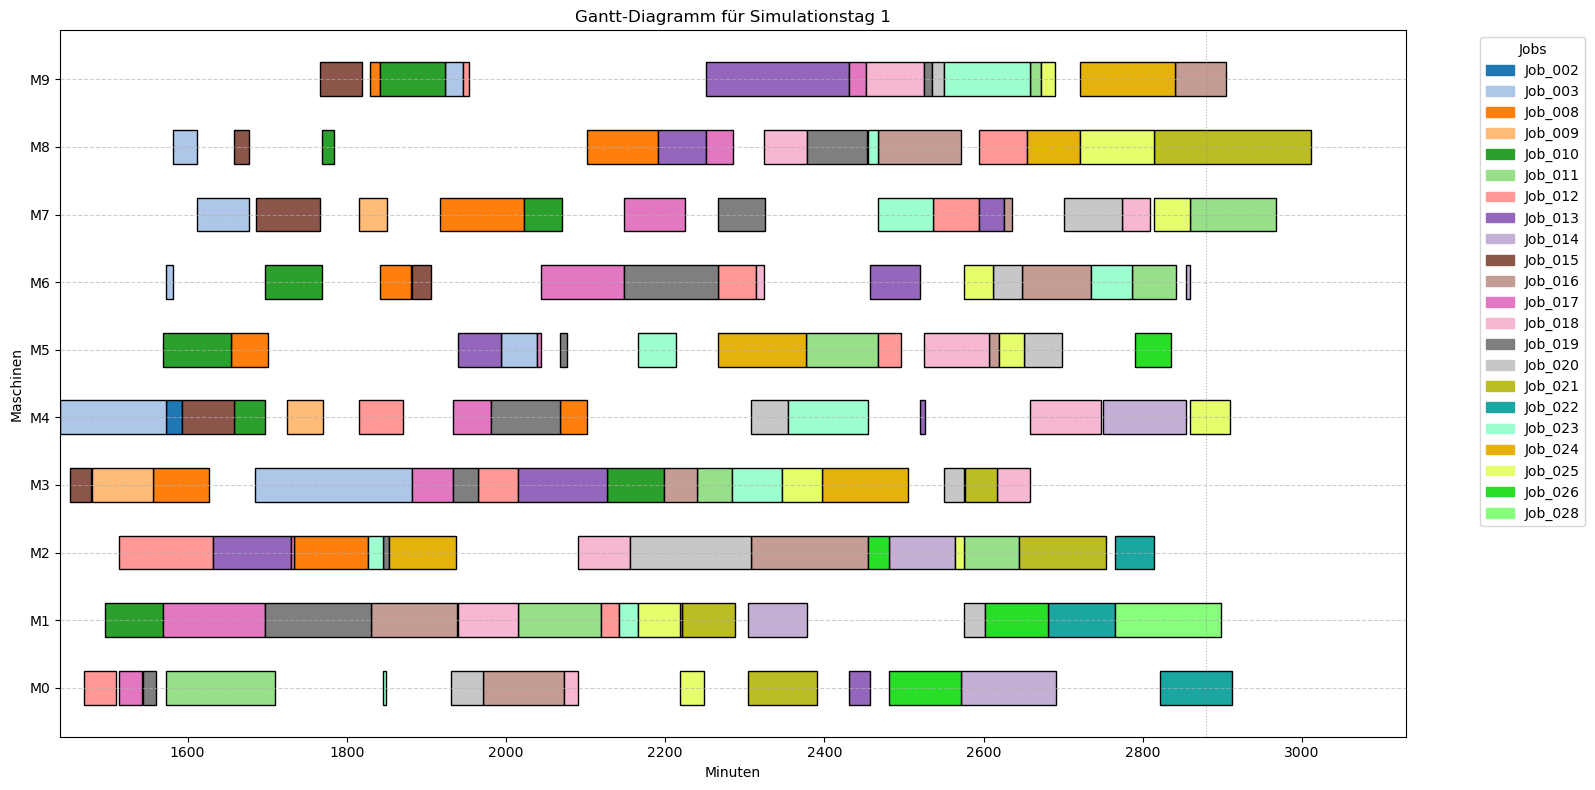

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 136490.657
  Solver-Status           : Optimal
  Anzahl Variablen        : 32848
  Anzahl Constraints      : 64738


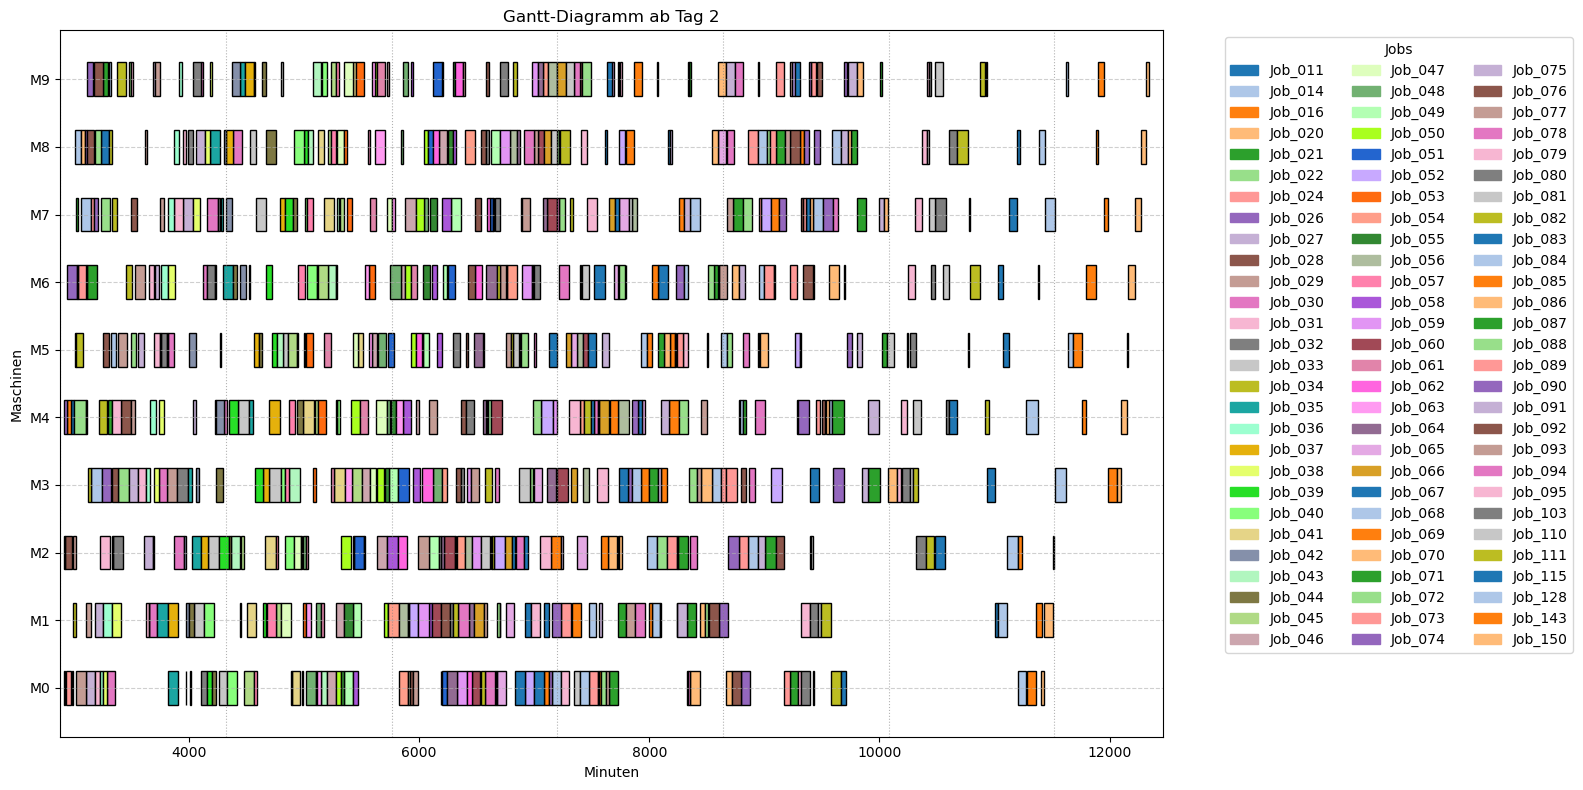

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[48:29:51] Job_026 started on M4
[48:31:26] Job_034 started on M2
[48:33:03] Job_028 started on M0
[48:43:28] Job_034 finished on M2 (after 12 minutes 01 second)
[48:46:21] Job_028 finished on M0 (after 13 minutes 18 seconds)
[48:46:21] Job_028 started on M2
[48:46:39] Job_024 started on M0
[49:07:19] Job_026 finished on M4 (after 37 minutes 28 seconds)
[49:07:19] Job_016 started on M4
[49:07:19] Job_026 started on M6
[49:45:52] Job_028 finished on M2 (after 59 minutes 31 seconds)
[49:47:39] Job_029 started on M2
[50:04:13] Job_016 finished on M4 (after 56 minutes 53 seconds)
[50:04:13] Job_011 started on M4
[50:04:15] Job_024 finished on M0 (after 77 minutes 36 seconds)
[50:04:15] Job_034 started on M0
[50:08:14] Job_034 finished on M0 (after 03 minutes 59 seconds)


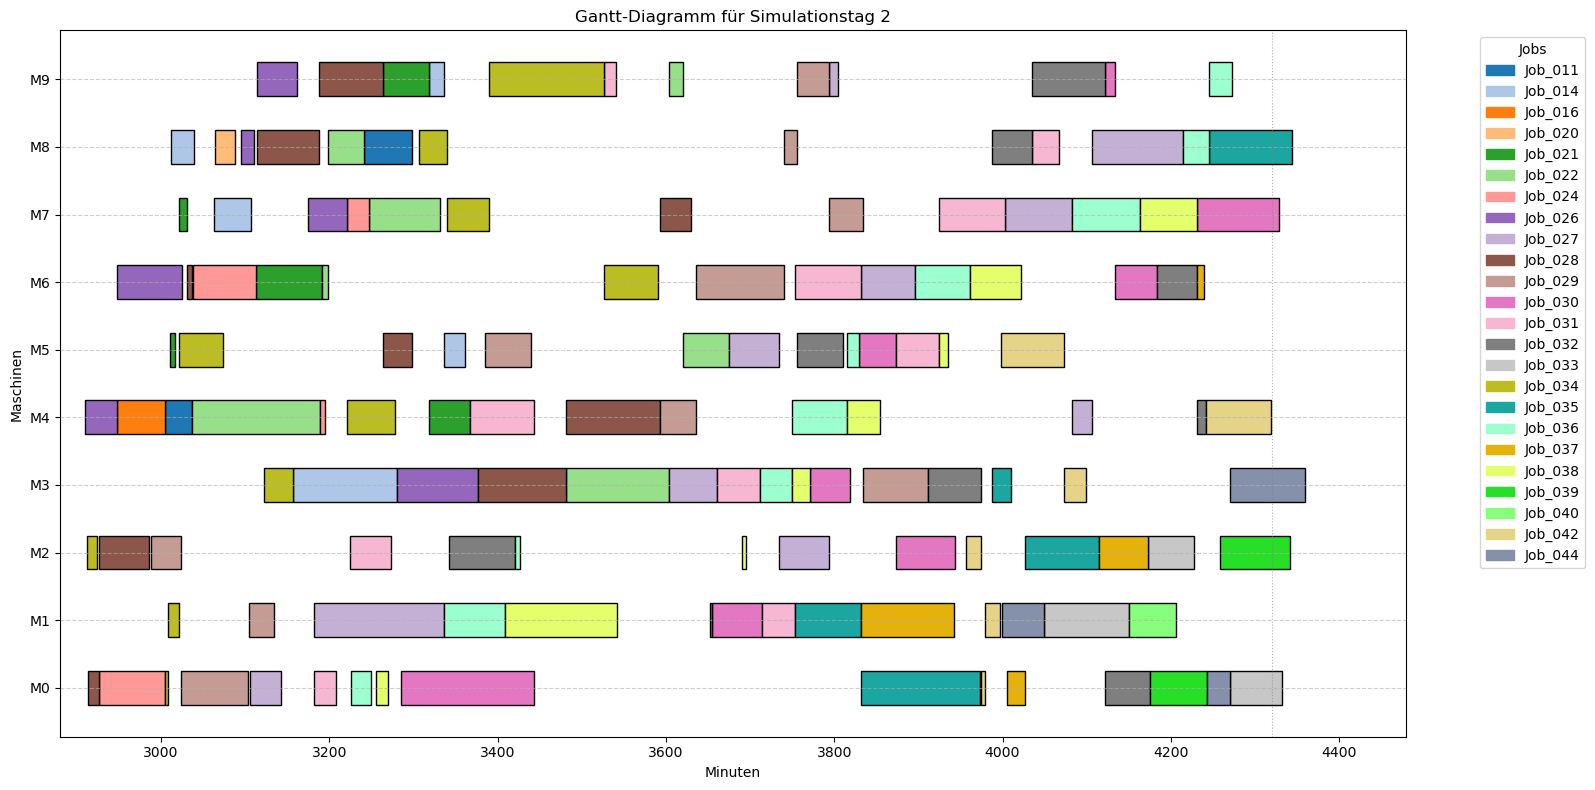

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 108419.8721
  Solver-Status           : Optimal
  Anzahl Variablen        : 36221
  Anzahl Constraints      : 71435


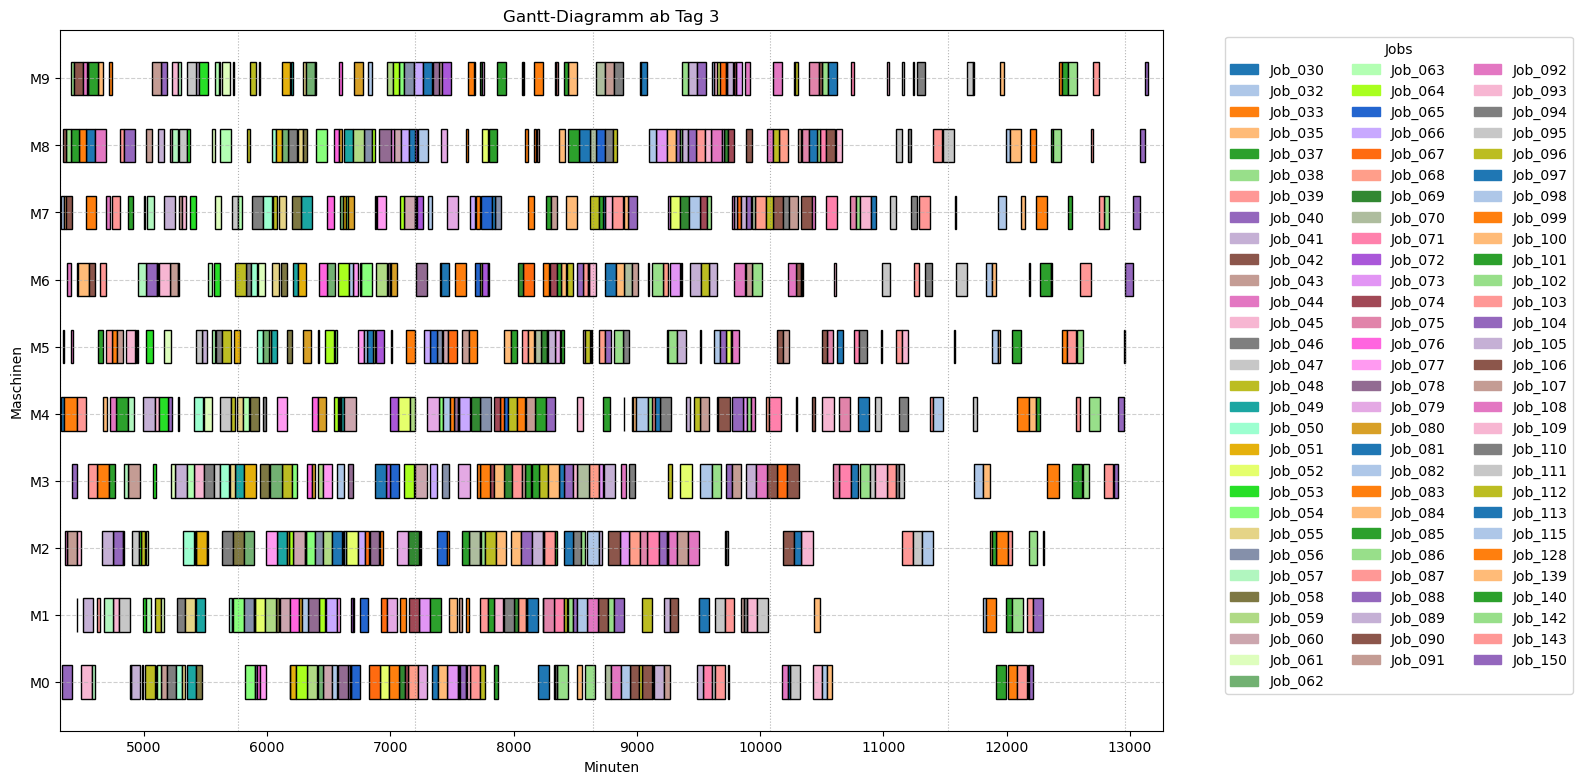

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[72:08:31] Job_030 started on M4
[72:09:07] Job_032 started on M7
[72:13:16] Job_040 started on M0
[72:23:51] Job_035 started on M5
[72:24:27] Job_042 started on M8
[72:34:06] Job_035 finished on M5 (after 10 minutes 15 seconds)
[72:36:58] Job_030 finished on M4 (after 28 minutes 28 seconds)
[72:36:58] Job_033 started on M4
[72:39:36] Job_044 started on M2
[72:44:10] Job_042 finished on M8 (after 19 minutes 43 seconds)
[72:46:03] Job_038 started on M8
[72:50:03] Job_032 finished on M7 (after 40 minutes 56 seconds)
[72:50:03] Job_035 started on M7
[72:52:19] Job_044 finished on M2 (after 12 minutes 44 seconds)
[72:52:36] Job_044 started on M6
[72:53:11] Job_043 started on M2
[72:58:12] Job_035 finished on M7 (after 08 minutes 10 seconds)
[72:58:12] Job_042 started on 

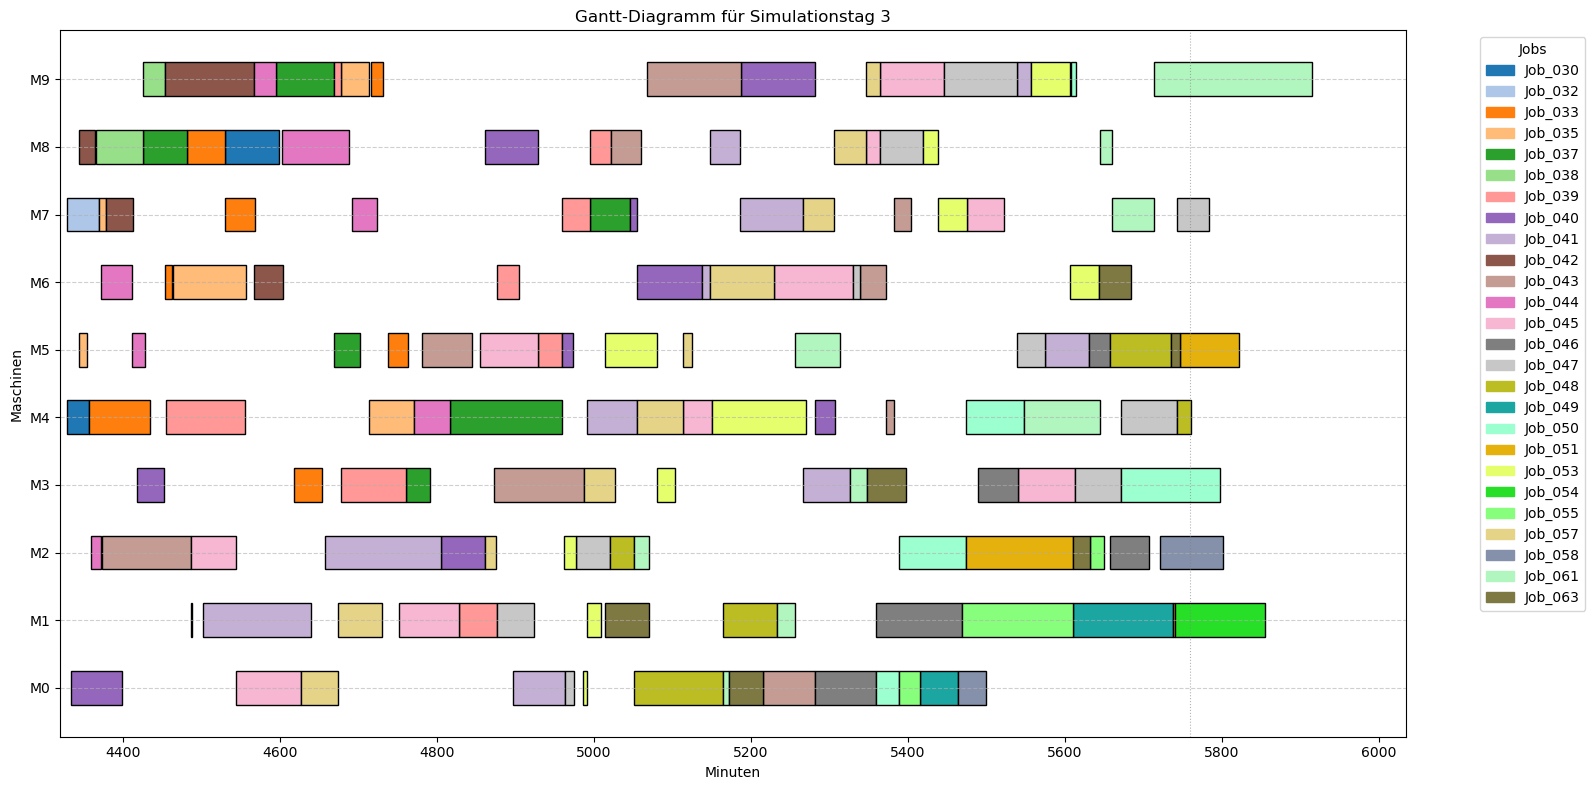

In [9]:
reschedul.run_multi_day_rescheduling(first_start=1, last_planning_start=3,
                                     day_length=day_length, horizon_days=horizon_days,
                                     df_times=df_times, df_jssp=df_jssp,
                                     df_execution=df_execution, df_undone=df_undone,
                                     df_plan=df_plan,
                                     notebook_prefix=notebook_prefix,
                                     rescheduler="bi_criteria_sum_tardiness_deviation",
                                     solver_limit=solver_limit,
                                     plot_results=True, this_r=0.4
)
